In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

In [82]:
class KNN:
    def __init__(self, k, data):
        self.k = k
        self.data = data
    
    def predict(self, x):
        dists_to_points = dict()
        for xn, yn in self.data:
            dist = np.sqrt(np.sum(xn-x)**2)
            dists_to_points[dist] = (xn, yn)
        dists = sorted(dists_to_points.keys())
        y = 0
        for i in range(np.amin([len(dists), self.k])):
            xn, yn = dists_to_points[dists[i]]
            y += yn
        return np.sign(y)

In [165]:
def gen_data(loc, n, scale=[1,1]):
    return np.random.normal(loc, scale, [n, 2])

In [204]:
def plot_data(title, train_data, test_data):
    train_x = map((lambda d: d[0][0]), train_data)
    train_y = map((lambda d: d[0][1]), train_data)
    test_x = map((lambda d: d[0][0]), test_data)
    test_y = map((lambda d: d[0][1]), test_data)
    col = map((lambda d:'red' if d[1] > 0 else 'blue'), train_data)
    plt.scatter(train_x,train_y,c=col, alpha=0.3)
    col = map((lambda d:'red' if d[1] > 0 else 'blue'), test_data)
    plt.scatter(test_x,test_y,c=col)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    #for p in predict_points:
    #    plt.annotate(p, xy=p, xytext=(20,20), textcoords='offset points',
    #                     arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'), zorder=100)
    plt.show()

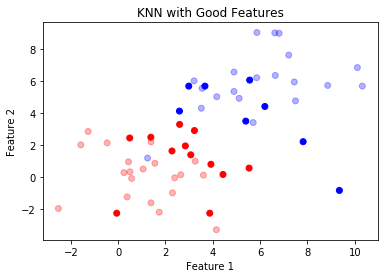

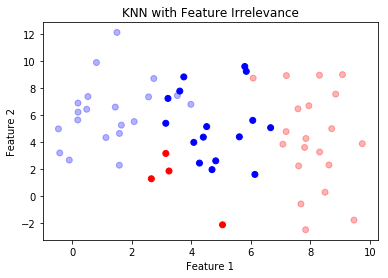

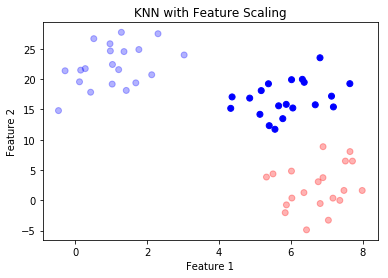

In [205]:
train_data_1_1 = gen_data([6,6], 20, [2,2])
train_data_1_2 = gen_data([1,0], 20, [2,2])
train_data_1 = map((lambda p: [p, -1]), train_data_1_1) + map((lambda p: [p, 1]), train_data_1_2)
knn1 = KNN(5, train_data_1)
test_data_1_1 = gen_data([3.5,3], 20, [2,2])
test_data_1 = map((lambda p: [p, knn1.predict(p)]), test_data_1_1)# + map((lambda p: [p, knn1.predict(p)]), test_data_1_2)

plot_data('KNN with Good Features', train_data_1, test_data_1)

train_data_2_1 = gen_data([1,5], 20, [1,3])
train_data_2_2 = gen_data([8,5], 20, [1,3])
train_data_2 = map((lambda p: [p, -1]), train_data_2_1) + map((lambda p: [p, 1]), train_data_2_2)
knn2 = KNN(5, train_data_2)
test_data_2_1 = gen_data([4.5,5], 20, [1,3])
test_data_2 = map((lambda p: [p, knn1.predict(p)]), test_data_2_1)# + map((lambda p: [p, knn1.predict(p)]), test_data_1_2)

plot_data('KNN with Feature Irrelevance', train_data_2, test_data_2)

train_data_3_1 = gen_data([1,22], 20, [1,3])
train_data_3_2 = gen_data([7,2], 20, [1,3])
train_data_3 = map((lambda p: [p, -1]), train_data_3_1) + map((lambda p: [p, 1]), train_data_3_2)
knn1 = KNN(5, train_data_3)
test_data_3_1 = gen_data([6,18], 20, [1,3])
test_data_3 = map((lambda p: [p, knn1.predict(p)]), test_data_3_1)# + map((lambda p: [p, knn1.predict(p)]), test_data_1_2)

plot_data('KNN with Feature Scaling', train_data_3, test_data_3)

[1, 1, 1]
[0]
[2, 1, 2]
[1]
